In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [32]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

0    7963
1    2037
Name: Exited, dtype: int64

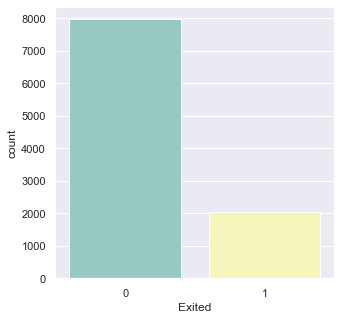

In [33]:
#visualisasi data
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

In [34]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

In [35]:
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [36]:
#normalisasi
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [37]:
#membuat data testing dan training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


In [38]:
#regresi logistik
from sklearn.linear_model import LogisticRegression

# membuat model
lr = LogisticRegression()

# Training model
lr.fit(x_train, y_train)

# Predict target value dengan data testing:
y_pred0 = lr.predict(x_test)

#indexing score
score_lr = lr.score(x_test, y_test)

C:\Users\Fajar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred0)
precision = precision_score(y_test, y_pred0)
recall = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.82
 >precision = 0.6779661016949152
 >recall = 0.19900497512437812
 >f1 = 0.3076923076923077


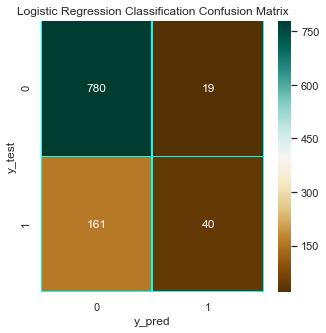

In [40]:
# visualiasi confussion matriks
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, y_pred0)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# membuat model dengan k=13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training model:
knn.fit(x_train, y_train)

# Predict target values dengan data testing:
y_pred1 = knn.predict(x_test)

#indexing score
score_knn = knn.score(x_test, y_test)

In [42]:
#membuat confussion matriks
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.839
 >precision = 0.8125
 >recall = 0.25870646766169153
 >f1 = 0.39245283018867927


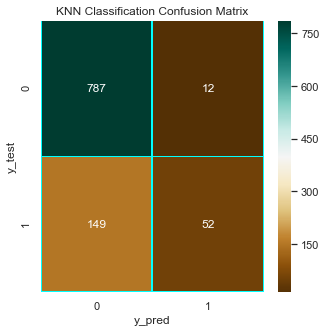

In [43]:
# Visualisasi confussion matriks
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [44]:
#SVM
from sklearn.svm import SVC

# membuat model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predict target values dengan data testing:
y_pred2 = svm.predict(x_test)

#indexing score
score_svm = svm.score(x_test, y_test)

C:\Users\Fajar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.801
 >precision = 1.0
 >recall = 0.009950248756218905
 >f1 = 0.019704433497536946


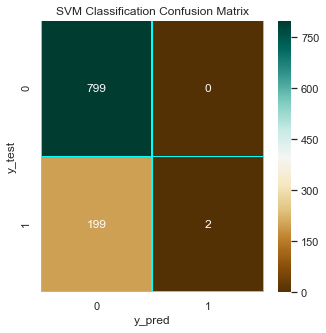

In [46]:
# Visualisasi confussion matrik
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, y_pred2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [47]:
from sklearn.naive_bayes import GaussianNB

# membuat model:
nb = GaussianNB()

# Training the model:
nb.fit(x_train, y_train)

# Predict target value dengan data testing:
y_pred3 = nb.predict(x_test)

#indexing score
score_nb = nb.score(x_test, y_test)

In [48]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.836
 >precision = 0.7846153846153846
 >recall = 0.2537313432835821
 >f1 = 0.3834586466165414


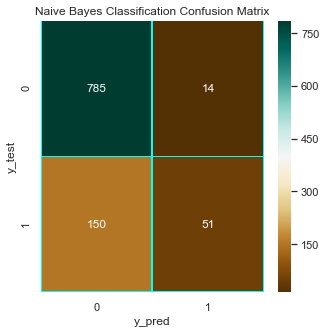

In [49]:
# visualisasi confussion matrik:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, y_pred3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [50]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

# membuat model:
dt = DecisionTreeClassifier()

# Training model:
dt.fit(x_train, y_train)

# Predict target value dengan data testing:
y_pred4 = dt.predict(x_test)

#indexing score
score_dt = dt.score(x_test, y_test)

In [51]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.791
 >precision = 0.48148148148148145
 >recall = 0.5174129353233831
 >f1 = 0.49880095923261386


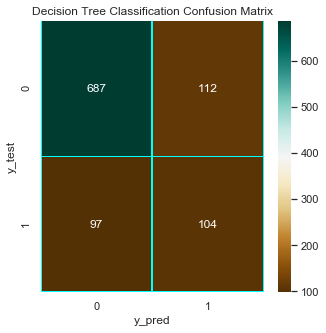

In [52]:
# visualisasi confussion matrik:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, y_pred4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [53]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

# membuat model:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training model:
rf.fit(x_train, y_train)

# Predict target value dengan data testing:
y_pred5 = rf.predict(x_test)

#indexing score
score_rf = rf.score(x_test, y_test)

In [54]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.862
 >precision = 0.7404580152671756
 >recall = 0.48258706467661694
 >f1 = 0.5843373493975904


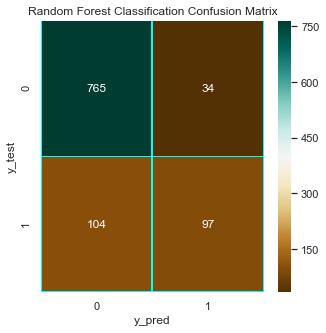

In [55]:
#visualisasi confussion matrik
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, y_pred5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [56]:
#Perbandingan akurasi
data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score', 'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.820
knn_score                    0.839
svm_score                    0.801
naive_bayes_score            0.836
decision_tree_score          0.791
random_forest_score          0.862
dtype: float64

In [57]:
#Perbandingan hasil dari model
d = {'y_test': y_test, 'log_reg_pred': y_pred0,'knn_prediction': y_pred1, 
     'svm_prediction': y_pred2, 'naive_bayes_prediction': y_pred3, 
     'decision_tree_prediction': y_pred4, 'random_forest_prediction': y_pred5}
data01 = pd.DataFrame(data=d)
data01.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
y_test,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
log_reg_pred,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
knn_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
svm_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
decision_tree_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
random_forest_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


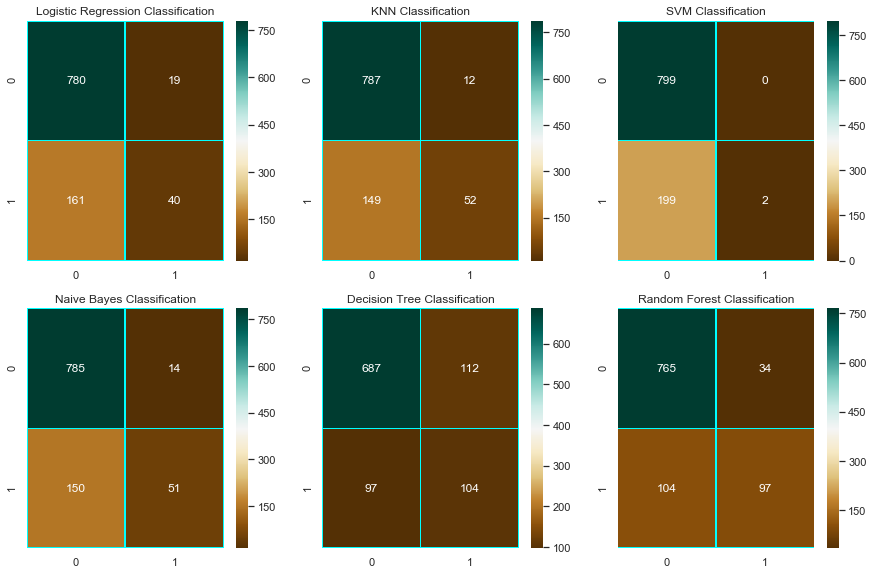

In [58]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()